## Support Vector Regressor Implementation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [ ]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [ ]:
X

array([[-0.449435  ,  0.81815013],
       [-0.7326141 ,  0.56380434],
       [ 0.68781233,  0.59811042],
       ...,
       [ 0.22907092,  0.98929419],
       [ 0.82110432, -0.91454595],
       [ 1.95398766, -0.8391708 ]])

In [ ]:
y

array([-1.64797180e+01, -4.25471826e+01,  7.20568373e+01,  5.65352809e+01,
        4.81143531e+01,  3.02518147e+01,  2.10764062e+00,  4.07635295e+01,
        1.47492328e+02,  3.35730411e+01, -4.26699980e+01,  4.96886410e+01,
       -5.36236455e+00,  9.77571037e+01, -2.01537719e+01,  3.74255588e+01,
        9.46827130e+01, -4.02841781e+01,  7.09322211e+01,  7.38272697e+01,
        1.10178494e+02,  7.11548189e+01, -1.08255101e+02,  3.36644509e+01,
        2.29159494e+01,  1.10890354e+02,  1.21269379e+02,  3.63010562e+01,
       -8.59836927e+01, -1.09518930e+01, -9.66979572e+01, -5.27545541e+01,
       -8.81510402e+01,  1.69888749e+01,  8.08229954e+01,  1.59125179e+01,
        1.50665564e+02, -1.23234230e+02,  1.57395184e+02, -6.18459521e+01,
        3.37916356e+01, -1.51443444e+02, -6.01138307e+01,  1.19475147e+02,
       -5.91963873e+01,  7.08420442e+00, -4.70479063e+01, -4.50420693e+01,
       -4.61957850e+01, -5.36319083e+01, -1.10347570e+02, -6.14481907e+01,
        7.60631953e+00, -

In [ ]:
pd.DataFrame(X)[0]

0     -0.449435
1     -0.732614
2      0.687812
3      0.614407
4      0.575440
         ...   
995    0.268841
996    0.653362
997    0.229071
998    0.821104
999    1.953988
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

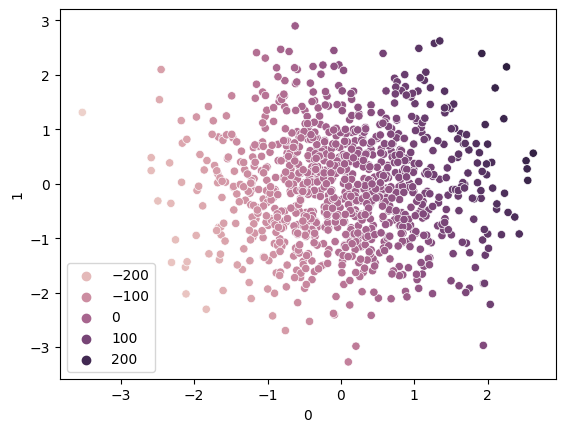

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='linear')

In [ ]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
svr.coef_

array([[81.4799025 , 25.21653745]])

In [ ]:
##Prediction
y_pred = svr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test,y_pred))

0.998477653832697


## Hyperparameter Tuning with SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [ ]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.777 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.772 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.753 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.777 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.772 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.753 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
y_pred1 = grid.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred1))

0.9984977430071209
